In [ ]:
import numpy as np
from numpy.matlib import repmat
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

from helper import *

%matplotlib inline
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.10.12


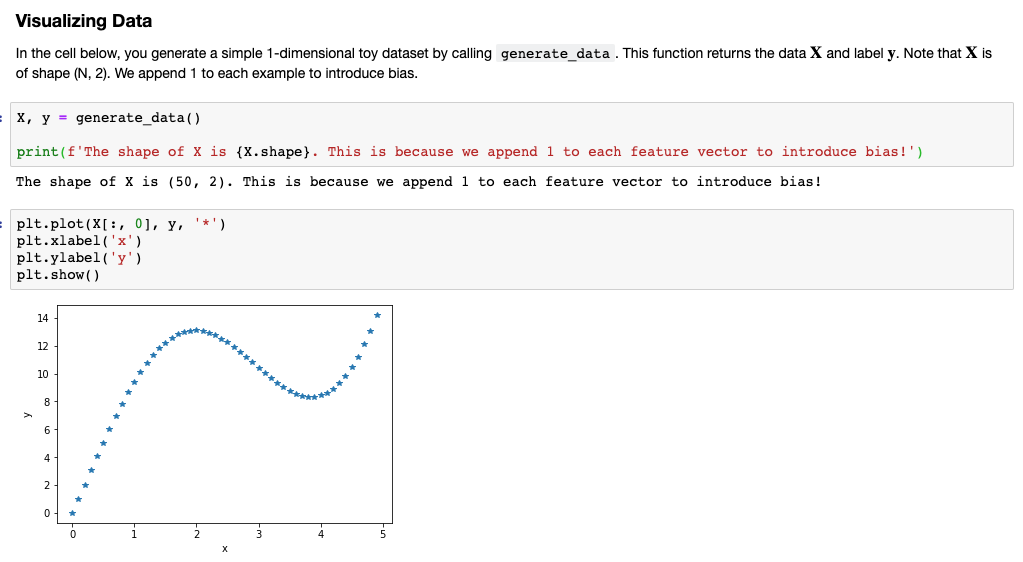

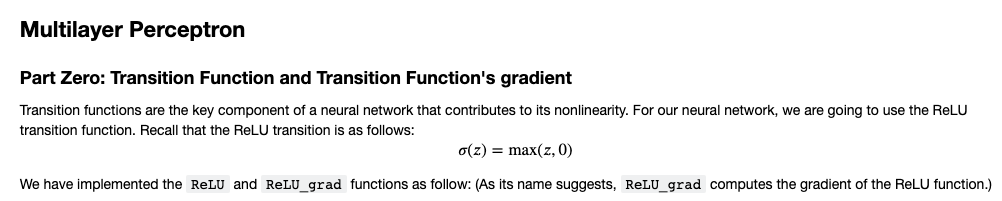

In [ ]:
def ReLU(z):
    return np.maximum(z, 0)

def ReLU_grad(z):
    return (z > 0).astype('float64')

Visualize the Activation Function
We can now visualize the activation function in the plot above by running the code in the cell below.

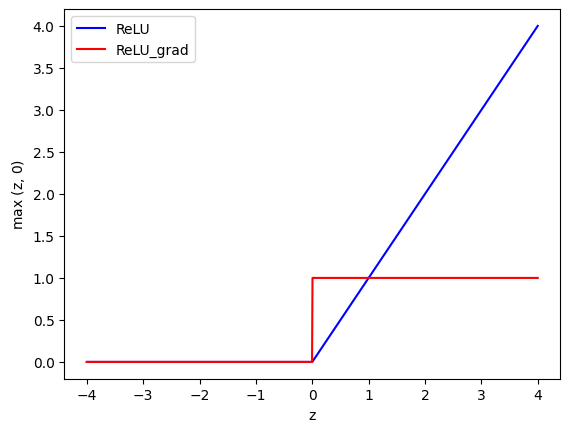

In [ ]:
plt.plot(np.linspace(-4, 4, 1000), ReLU(np.linspace(-4, 4, 1000)),'b-')
plt.plot(np.linspace(-4, 4, 1000), ReLU_grad(np.linspace(-4, 4, 1000)),'r-')
plt.xlabel('z')
plt.ylabel(r'$\max$ (z, 0)')
plt.legend(['ReLU','ReLU_grad'])

We can also display the function and its gradient on a small example vector:

In [ ]:
x=np.array([2.7,-0.5,-3.2])
print("X:",x)
print("ReLU(X):",ReLU(x))
print("ReLU_grad(X):",ReLU_grad(x))

X: [ 2.7 -0.5 -3.2]
ReLU(X): [2.7 0.  0. ]
ReLU_grad(X): [1. 0. 0.]


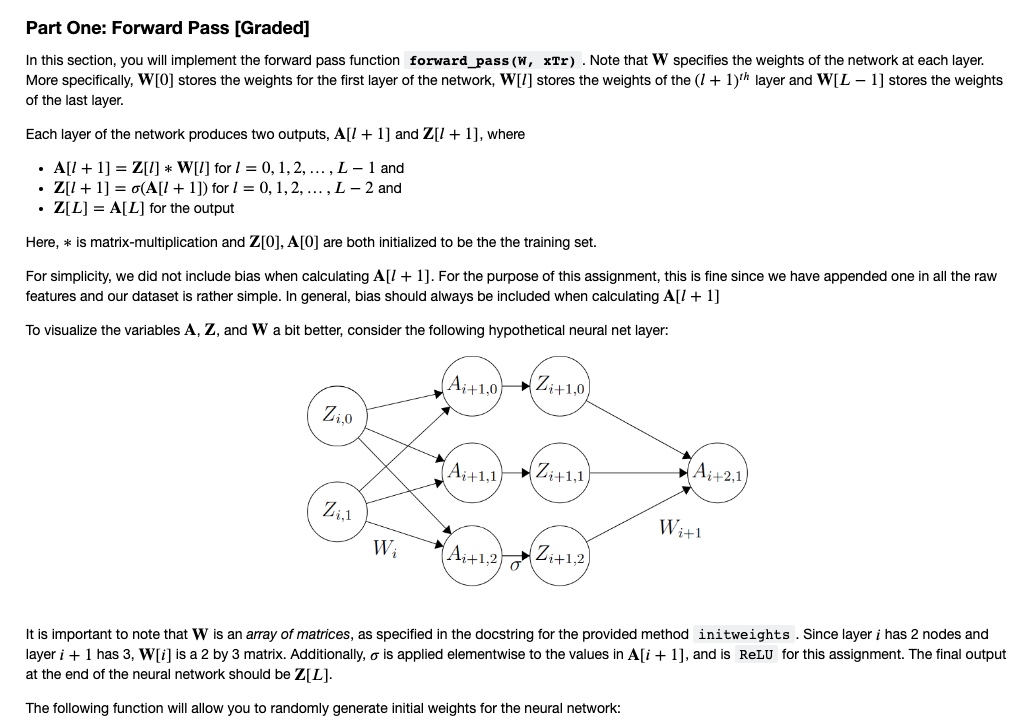

In [ ]:
def initweights(specs):
    """
    Given a specification of the neural network, output a random weight array.

    Input:
        specs: array of length m-1, where m = len(specs). specs[0] should be the
               dimension of the feature and spec[-1] should be the dimension of output

    Output:
        W: array of length m-1, each element is a matrix where W[i].shape == (specs[i], specs[i+1])
    """
    W = []
    for i in range(len(specs) - 1):
        W.append(np.random.randn(specs[i], specs[i+1]))
    return W

If we want to create a network that:

1) Takes in feature of dimension 2

2) Has 1 hidden layer with 3 hidden units

3) Outputs a scalar

Then we initialize the the weights the following way:

In [ ]:
W = initweights([2, 3, 1])

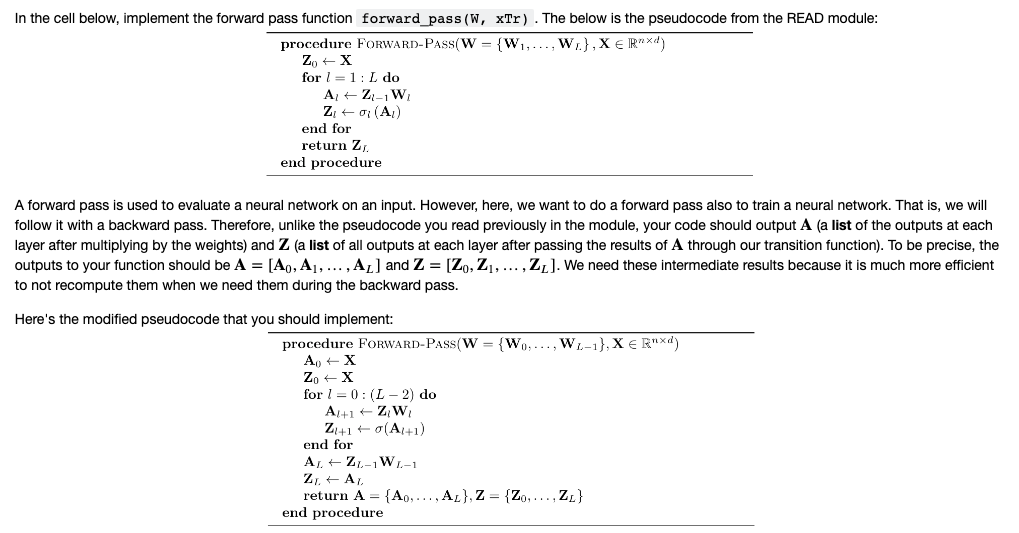

In [ ]:
def forward_pass(W, xTr):
    """
    Propagates the data matrix xTr forward in the network specified by the weight matrices in the array W

    Input:
        W: a list of L weight matrices, specifying the network
        xTr: nxd data matrix. Each row is an input vector

    OUTPUTS:
        A, Z
        A: a list of L+1 matrices, each of which is the result of matrix multiplication of previous layer's outputs and weights.
           The first matrix in the list is xTr.
        Z: a list of L+1 matrices, each of which is the result of transition functions on elements of A.
           The first matrix in the list is xTr.
    """

    # Initialize A and Z
    A = [xTr]
    Z = [xTr]

    for i in range(len(W)):
        A.append(Z[i] @ W[i]) #dot product multiplication between nxd data matrix and nx2 weight matrix
        if i < len(W) - 1:
            Z.append(ReLU(A[-1])) #perform transition function only on the last entry of A array
        else:
            Z.append(A[-1]) #in final layer Z = A
    return A, Z

In [ ]:
def forward_test1():
    X, _ = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    out = forward_pass(W, X) # run forward pass
    return len(out) == 2 # make sure that your function return a tuple

def forward_test2():
    X, _ = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X) # run forward pass
    return len(A) == 3 and len(Z) == 3 # Make sure that output produced match the length of the weight + 1

def forward_test3():
    X, _ = generate_data() # generate data
    n, d = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X) # run forward pass
    return (A[0].shape == (n, d) and
            Z[0].shape == (n, d) and
            A[1].shape == (n, 3) and
            Z[1].shape == (n, 3)  and
            A[2].shape == (n, 1) and
            A[2].shape == (n, 1) ) # Make sure the layer produce the right shape output

def forward_test4():
    X = -1*np.ones((1, 2)) # generate a feature matrix of all negative ones
    W = [np.ones((2, 1))] # a single layer network with weights one
    A, Z = forward_pass(W, X) # run forward pass

    # check whether you do not apply the transition function to A[-1]
    return np.linalg.norm(Z[-1] - X@W[0]) < 1e-7

def forward_test5():
    X, _ = generate_data() # generate data
    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X) # run your forward pass
    A_grader, Z_grader = forward_pass_grader(W, X) # run our forward pass

    Adiff = 0
    Zdiff = 0

    # compute the difference between your solution and ours
    for i in range(1, 3):
        Adiff += np.linalg.norm(A[i] - A_grader[i])
        Zdiff += np.linalg.norm(Z[i] - Z_grader[i])

    return Adiff < 1e-7 and Zdiff < 1e-7

runtest(forward_test1, "forward_test1")
runtest(forward_test2, "forward_test2")
runtest(forward_test3, "forward_test3")
runtest(forward_test4, "forward_test4")
runtest(forward_test5, "forward_test5")

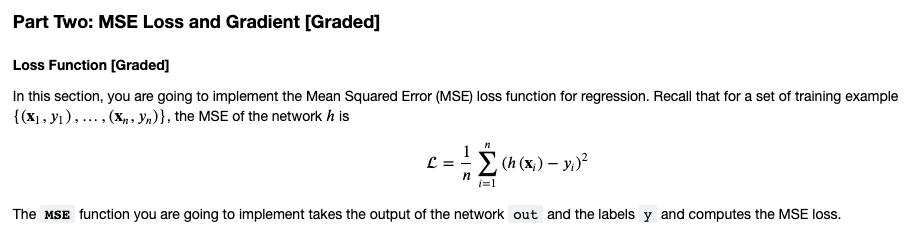

In [ ]:
def MSE(out, y):
    """
    Calculates the Mean Squared Error for output and true labels y.

    Input:
        out: output of network (n-dimensional vector)
        y: true labels (n-dimensional vector)

    Output:
        loss: the MSE loss (a scalar)
    """

    n = len(y)
    loss = 0

    loss = np.sum(np.square(np.subtract(out,y)))/n

    return loss

In [ ]:
def MSE_test1():
    X, y = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    loss = MSE(Z[-1].flatten(), y) # calculate loss

    return np.isscalar(loss) # your loss should be a scalar

def MSE_test2():
    X, y = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    loss = MSE(Z[-1].flatten(), y) # calculate loss

    return loss >= 0 # your loss should be nonnegative

def MSE_test3():
    X, y = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    loss = MSE(Z[-1].flatten(), y) # calculate loss
    loss_grader = MSE_grader(Z[-1].flatten(), y)

    # your loss should not deviate too much from ours
    # If you fail this test case, check whether you divide your loss by 1/n
    return np.absolute(loss - loss_grader) < 1e-7

runtest(MSE_test1, "MSE_test1")
runtest(MSE_test2, "MSE_test2")
runtest(MSE_test3, "MSE_test3")

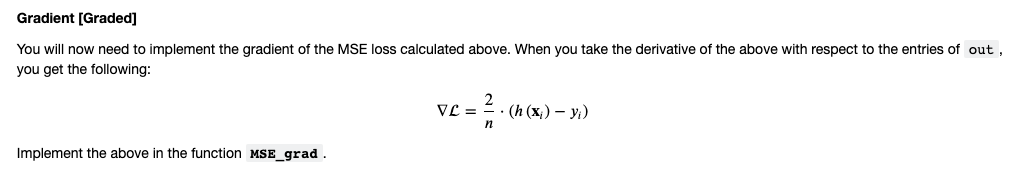

In [ ]:
def MSE_grad(out, y):
    """
    Calculates the gradient of the MSE loss w.r.t. network output.

    Input:
        out: output of network (n-dimensional vector)
        y: true labels (n-dimensional vector)

    Output:
        grad: the gradient of the MSE loss with respect to out (n-dimensional vector)
    """

    n = len(y)
    grad = np.zeros(n)

    grad = np.multiply((2/n),np.subtract(out, y))

    return grad

In [ ]:
def MSE_grad_test1():
    X, y = generate_data() # generate data

    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)

    grad = MSE_grad(Z[-1].flatten(), y)
    return grad.shape == (n, ) # check if the gradient has the right shape

def MSE_grad_test2():
    out = np.array([1])
    y = np.array([1.2])

    # calculate numerical gradient using finite difference
    numerical_grad = (MSE(out + 1e-7, y) - MSE(out - 1e-7, y)) / 2e-7
    grad = MSE_grad(out, y)

    # check your gradient is close to the numerical gradient
    return np.linalg.norm(numerical_grad - grad) < 1e-7

def MSE_grad_test3():
    X, y = generate_data() # generate data

    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)

    grad = MSE_grad(Z[-1].flatten(), y)
    grad_grader = MSE_grad_grader(Z[-1].flatten(), y) # compute gradient using our solution

    # your gradient should not deviate too much from ours
    return np.linalg.norm(grad_grader - grad) < 1e-7

runtest(MSE_grad_test1, 'MSE_grad_test1')
runtest(MSE_grad_test2, 'MSE_grad_test2')
runtest(MSE_grad_test3, 'MSE_grad_test3')

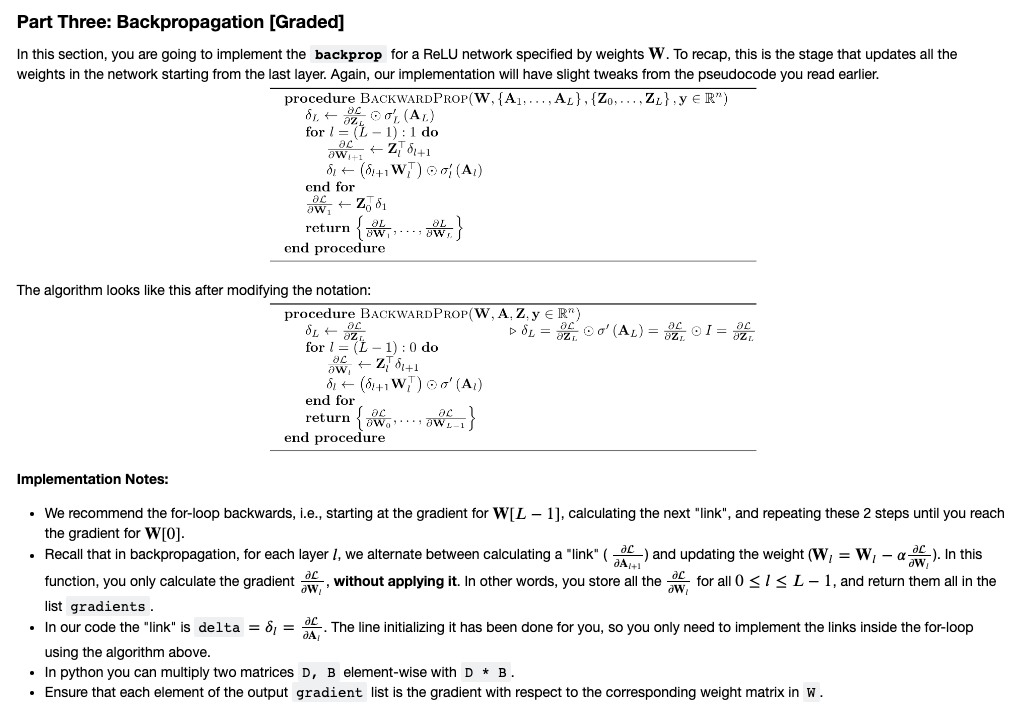

In [ ]:
#working code
def backprop(W, A, Z, y):
    """
    Implements the back-propagation algorithm for the network specified by weights in W
    and intermediate values A, Z for the data propagated forward (corresponding labels y).

    Input:
        W: a list of L weight matrices
        A: a list of L+1 matrices, each of which is the result of matrix multiplication of previous layer's outputs and weights.
           The first matrix in the list is the data.
        Z: a list of L+1 matrices, each of which is the result of transition functions on elements of A.
           The first matrix in the list is the data.
        y: true labels (n-dimensional vector)

    Output:
        gradient: a list of L matrices, each of which is the gradient with respect to the corresponding entry of W
    """

    # Convert delta to a row vector to make things easier
    delta = (MSE_grad(Z[-1].flatten(), y) * 1).reshape(-1, 1) #this is dL/dZ for the last layer Z[-1], which corresponds to dL/dW for the last layer as no transition function is applied to last layer outputs A[-1] = Z [-1]

    # compute gradient dL/dW with backprop
    gradients = [None] * len(W)  # Initialize an empty list to store gradients

    for l in np.flip(range(len(W))):
        gradients[l] = Z[l].T @ delta #last gradient uses the penultimate matrix Z[l], as Z is L+1 long
        delta = (delta @ W[l].T)*ReLU_grad(A[l]) #delta update uses the last weight[l] but the penultimate A[l], as A is L+1 long

    return gradients


In [ ]:
def backprop(W, A, Z, y):
    """
    Implements the back-propagation algorithm for ReLU.
    """

    # Convert delta to a row vector to make things easier
    delta = MSE_grad(Z[-1].flatten(), y).reshape(-1, 1)

    # compute gradient with backprop
    gradients = [None] * len(W)  # Initialize an empty list to store gradients

    # Last layer's gradient
    gradients[-1] = delta @ Z[-2].T

    for l in np.flip(range(len(W)-1)):
        delta = (W[l+1].T @ delta) * ReLU_grad(Z[l])  # Derivative of ReLU
        gradients[l] = delta @ Z[l-1].T  # If l=0, Z[-1] will be the input layer

    return gradients


In [ ]:
def backprop_test1():
    X, y = generate_data() # generate data

    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)

    gradient = backprop(W, A, Z, y) # backprop to calculate the gradient

    # You should return a list with the same len as W
    return len(gradient) == len(W)

def backprop_test2():
    X, y = generate_data() # generate data

    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)

    gradient = backprop(W, A, Z, y) # backprop to calculate the gradient

    # gradient[i] should match the shape of W[i]
    return np.all([gradient[i].shape == W[i].shape for i in range(len(W))])

def backprop_test3():
    X, y = generate_data() # generate data

    n, _ = X.shape

    # Use a one layer network
    # This is essentially the least squares
    W = initweights([2, 1])

    A, Z = forward_pass(W, X)

    # backprop to calculate the gradient
    gradient = backprop(W, A, Z, y)

    # calculate the least square gradient
    least_square_gradient = 2 *((X.T @ X) @ W[0] - X.T @ y.reshape(-1, 1)) / n

    # gradient[0] should be the least square gradient
    return np.linalg.norm(gradient[0] - least_square_gradient) < 1e-7

def backprop_test4():
    X, y = generate_data() # generate data

    n, _ = X.shape

    # Use a one layer network
    # This is essentially the least squares
    W = initweights([2, 5, 5, 1])

    A, Z = forward_pass(W, X)

    # backprop to calculate the gradient
    gradient = backprop(W, A, Z, y)

    # calculate the backprop gradient
    gradient_grader = backprop_grader(W, A, Z, y)

    # Check whether your gradient matches ours
    OK=[len(gradient_grader)==len(gradient)] # check if length matches
    for (g,gg) in zip(gradient_grader,gradient): # check if each component matches in shape and values
        OK.append(gg.shape==g.shape and (np.linalg.norm(g - gg) < 1e-7))
    return(all(OK))

def backprop_test5():
    # Here we reverse your gradient output and check that reverse with ours. It shouldn't match.
    # If your reverse gradient matches our gradient, this means you outputted the gradient in reverse order.
    # This is a common mistake, as the loop is backwards.
    X, y = generate_data() # generate data

    n, _ = X.shape

    # Use a one layer network
    # This is essentially the least squares
    W = initweights([2, 5, 5, 1])

    A, Z = forward_pass(W, X)

    # backprop to calculate the gradient
    gradient = backprop(W, A, Z, y)

    # calculate the backprop gradient
    gradient_grader = backprop_grader(W, A, Z, y)

    gradient.reverse() # reverse the gradient. From now on it should NOT match
    # Check whether your gradient matches ours
    OK=[] # check if length matches
    for (g,gg) in zip(gradient_grader,gradient): # check if each component matches
        OK.append(gg.shape==g.shape and (np.linalg.norm(g - gg) < 1e-7))
    return(not all(OK))



runtest(backprop_test1, 'backprop_test1')
runtest(backprop_test2, 'backprop_test2')
runtest(backprop_test3, 'backprop_test3')
runtest(backprop_test4, 'backprop_test4')
runtest(backprop_test5, 'backprop_test5')

# **Part Four: Training with Gradient Descent**
Run the cell below to train a ReLU Network for the task with Gradient Descent. Feel free to play around with the hyperparameters such learning rate, number of epochs, number of hidden layers, size of each hidden layers.

In [ ]:
#generate data
X, y = generate_data() # generate data


# learning rate for Gradient Descent
lr = 0.001

# Number of epochs
# one epoch - one full pass through the dataset
M = 10000

# keep track of the losses
losses = np.zeros(M)
t0 = time.time()

# initialize a neural network with one hidden layer
# Try varying the depth and width of the neural networks to see the effect

W = initweights([2, 200, 1])
W_init = [w.copy() for w in W]

# Start training
for i in range(M):

    # Do a forward pass
    A, Z = forward_pass(W, X)

    # Calculate the loss
    losses[i] = MSE(Z[-1].flatten(), y)

    # Calculate the loss using backprop
    gradients = backprop(W, A, Z, y)

    # Update he parameters
    for j in range(len(W)):
        W[j] -= lr * gradients[j]
t1 = time.time()
print('Elapsed time: %.2fs' % (t1-t0))
plot_results(X[:, 0], y, Z, losses)

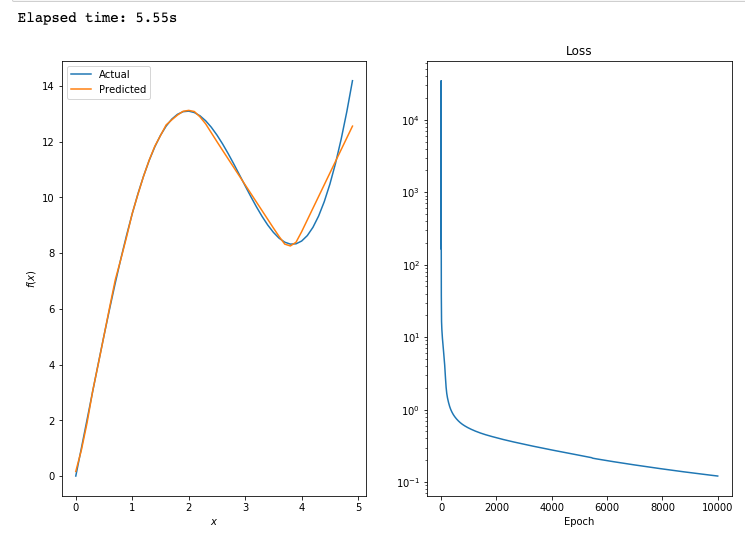

# **Tensorflow**
Tensorflow is a widely known Machine Learning library that provides classes and functions to create neural networks from scratch and train them using gradient descent (and its variants). The library also provides numerous datasets, many of which are widely used in industry and academic research.

Most importantly, Tensorflow, and other Machine Learning libraries such as Pytorch and MXNet , allow for "automatic differentiation". With this feature, the developer only needs to specify the neural network architecture (e.g. kind of layers, number of hidden units, activation functions etc.); the library performs backpropagation automatically---it computes gradients for the trainable weights of the network and applies them during training. This feature is extremely useful when the network design becomes complex and it becomes difficult to write backprop functions by hand.

Training a model with Tensorflow
In this section, we show you how to train a model with Tensorflow. The steps are similar to above:

Define the model structure, describing the layers for forward propagation.
Define the optimizer, i.e., the variant of gradient descent you want to use.
Define the loss function to minimize.
"Fit" the model on training data for  𝑀
  epochs.
The "fitting" process propagates the data forward in the network, computes the loss value, computes the gradients for the weights, and updates the weights for  𝑀
  times.

In [ ]:
import tensorflow as tf
print('TF version: %s' % (tf.__version__))

# Tensorflow by default uses float32 and expects data in that format. Since our data matrices X and y are in np.float64 format, we specify float64 here.
tf.keras.backend.set_floatx('float64')

In [ ]:
# 1. Define the model structure
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=200, input_dim=2, activation='relu', use_bias=False, kernel_initializer='random_normal'),
    tf.keras.layers.Dense(units=1, activation=None, use_bias=False, kernel_initializer='random_normal'),
])

Let's break this down. Our network should comprise of 3 layers: [input, hidden, output].

The input layer should have 2 dimensions to match the feature dimension of each of the 50 training points in  𝐗
 .
Using Dense with 200 units, we specify a fully-connected layer with 200 hidden units. This is equivalent to multiplying 2-dimensional input with  𝐖0
  of shape  2×200
 . We also specify the ReLU activation function.
Then we specify another Dense layer with 1 unit, which is equivalent to multiplying the 200-dimensional hidden layer vector with  𝐖1
  of shape  200×1
 . Here we don't specify any activation function as the final  𝐙2
  is just  𝐀2
 .
To emulate the network in the exercise above, we initialize the weights of the Tensorflow network with random normal values. Since  𝐗
  already contains a bias value, we avoid bias terms in the network.

To emulate the network in the exercise above, we initialize the weights of the Tensorflow network with random normal values. Since  𝐗
  already contains a bias value, we avoid bias terms in the network.

In [ ]:
# 2. Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
training_batch_size = len(y)

Tensorflow does not provide vanilla gradient descent. Instead, the basic variant it provides is called Stochastic Gradient Descent (SGD). To match our implementation above, we can use SGD to behave like vanilla gradient descent by setting the training_batch_size to the number of data points.

What does this do? Although the loss is calculated using all data points, SGD computes the gradients of weights using training_batch_size number of data points. So, when the training_batch_size is smaller than the number of training data points, SGD approximates the gradients of weights (this is done for various reasons, but we will not discuss it here). To compute exact gradients and match our implementation in the previous section, we just set the training_batch_size to number of training points len(y).

In [ ]:
# 3. Define loss function
loss = tf.keras.losses.MeanSquaredError()

t0 = time.time()

# Attach the optimizer and loss function to the model
model.compile(optimizer=optimizer,loss=loss)

# 4. Fit the model on training data
history = model.fit(
    X,
    y,
    epochs=M,
    batch_size=training_batch_size,
    verbose=0, # no progress bar
)
t1 = time.time()
print('Elapsed time: %.2fs' % (t1-t0))

It is possible that the Tensorflow model takes much longer to train that our initial implementation took. This is because of the massive overhead Tensorflow requires to setup and train the model. However, as the number of training points increases and the network becomes more complex, Tensorflow (and other Machine Learning libraries) scale much better than pure-Numpy implementations---even better when you use a GPU. For this reason, developers and researchers almost always use libraries like Tensorflow and Pytorch to train networks.

In [ ]:
def tf_activations(model, X):
    """
    function tf_activations(model, X)

    INPUT:
    model - Tensorflow model
    X - nxd matrix. Each row is an input vector

    OUTPUTS:
    Z - a list of matrices (of length L) that stores result of transition function at each layer
    """
    inputs = [model.input]
    outputs = [layer.output for layer in model.layers]             # all layer outputs
    get_activations = tf.keras.backend.function(inputs, outputs)   # evaluation function

    Z = [X] + get_activations([X])
    return Z

losses = history.history['loss']
Z = tf_activations(model, X)
plot_results(X[:, 0], y, Z, losses)

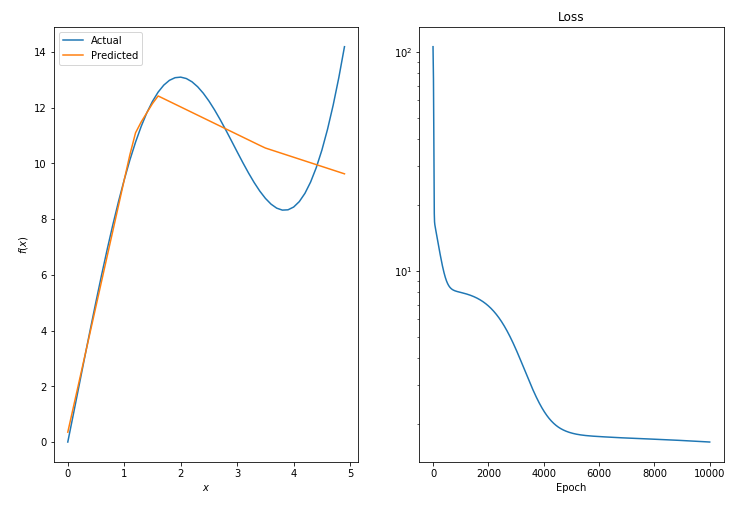

Don't worry if these plots don't match the ones above! The Numpy and Tensorflow implementations had different initial weights for the network. It is possible to obtain matching plots by specifying initial weights in Tensorflow; however, the approach is a little more involved and we will leave it to the curious reader.